In [16]:
import sys
sys.path.insert(0, "src")

from dataclasses import dataclass

import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt

plt.rcParams.update({
    "text.usetex": True,
    "font.family": "Helvetica"
})
plt.rc("text.latex", preamble=r"\usepackage{bm}")

# Smothstep Plot

In [17]:
font_size = "x-large"

@dataclass
class SETTINGS:

    mu = 1
    mu_0 = 0.3
    x_num_pts = 100
    cmap = "coolwarm"
    dpi = 300

    show_legend = False
    show_inplot_legend = True

    label_smoothstep = "$s(x)$"
    label_smoothstep_scaled = r"$\widetilde{s}(x, \mu_0)$"

    label_smoothstep_pos = [0.375, 0.5]
    label_smoothstep_scaled_pos = [0.6, 0.6]
    label_font_dic = {
        "fontsize": font_size
    }

@dataclass
class HLINE_SETTINGS:

    hline_style = {
        "color": "black",
        "ls": "--",
        "alpha": 0.5,
    }

    text_offset = -0.01
    x_text = -0.05
    text_fontdict = {
        "fontsize": font_size
    }

@dataclass
class VLINE_SETTINGS:

    hline_style = {
        "color": "black",
        "ls": "--",
        "alpha": 0.5,
    }

    text_offset = -0.005
    y_text = -0.07
    text_fontdict = {
        "fontsize": font_size
    }

def smoothstep(x):
    return 2*x**3 - 3*x**2 + 1

def smoothstep(x):
    return -x + 1

def scaled_smoothstep(x, mu, mu_0):

    s = smoothstep(x)
    ss = mu - (mu - mu_0) * x
    return ss

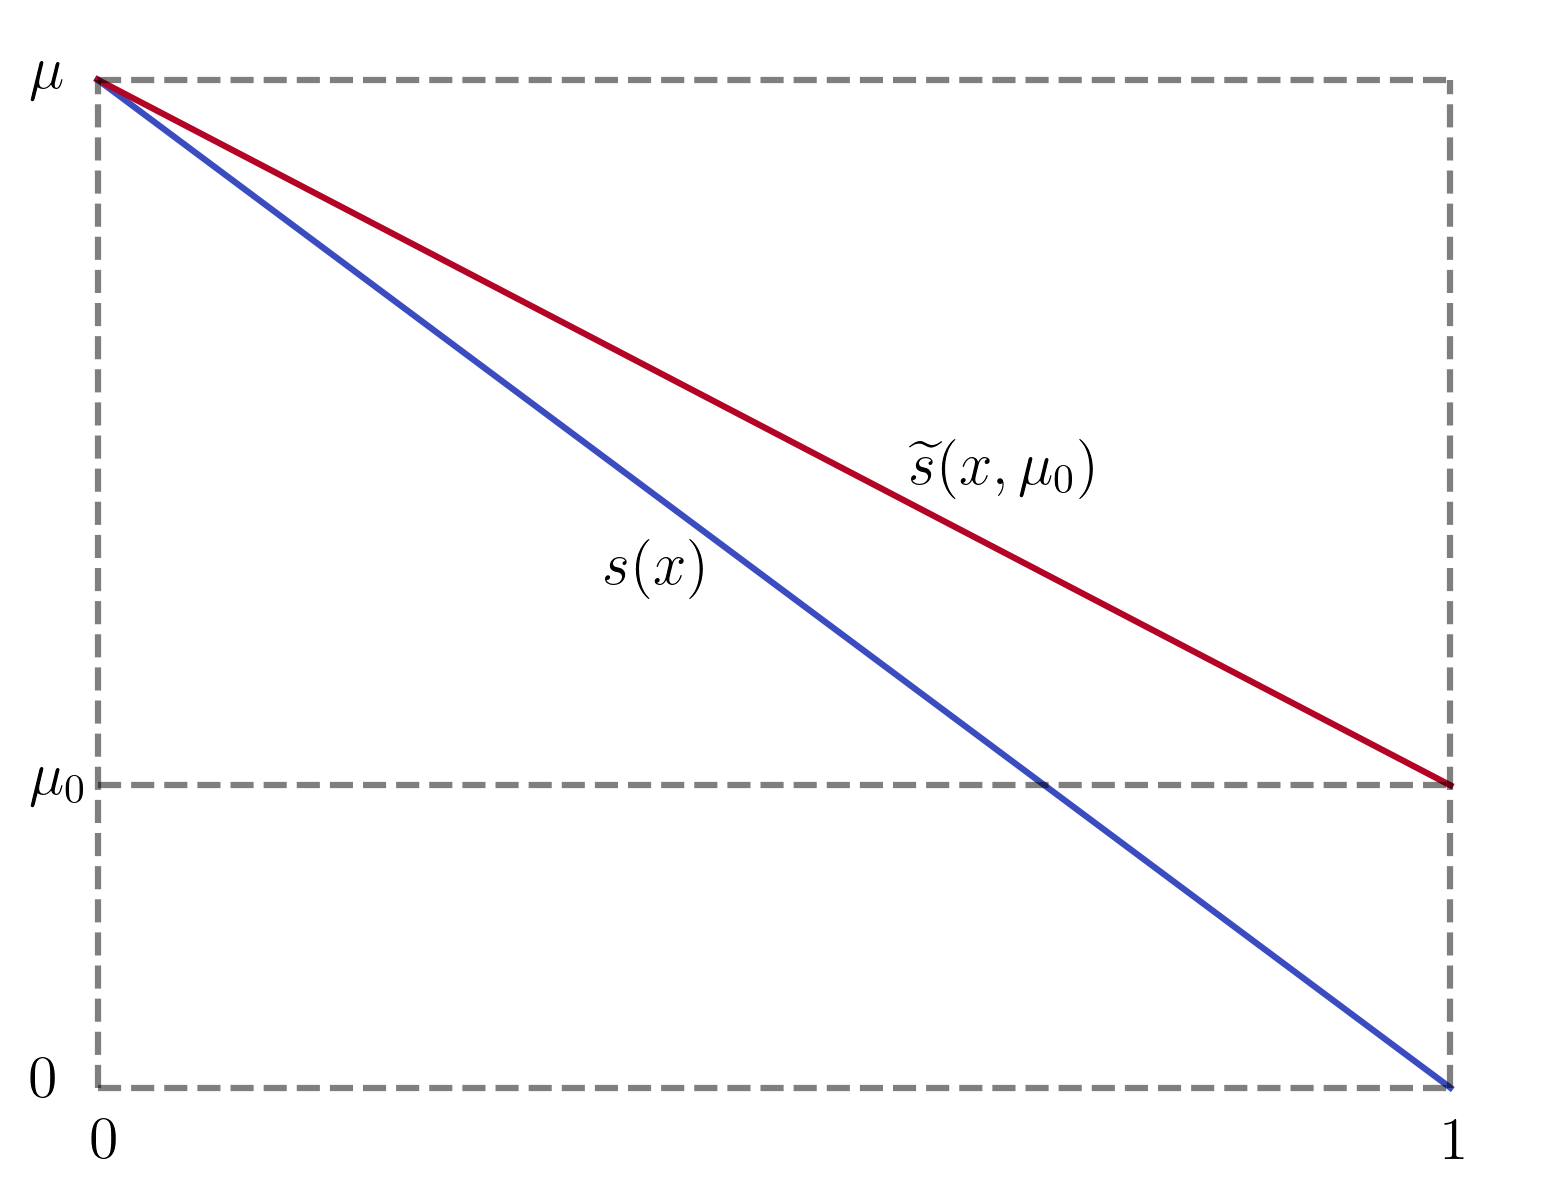

In [18]:
cmap = mpl.cm.get_cmap(SETTINGS.cmap)

x = np.linspace(0, 1, SETTINGS.x_num_pts)

y = SETTINGS.mu * smoothstep(x)
y_scaled = scaled_smoothstep(x, SETTINGS.mu, SETTINGS.mu_0)

fig = plt.figure(dpi=SETTINGS.dpi)
ax = plt.subplot()

ax.plot(
    x,
    y,
    label=SETTINGS.label_smoothstep,
    color=cmap(0)
)
ax.plot(
    x,
    y_scaled,
    label=SETTINGS.label_smoothstep_scaled,
    color=cmap(np.inf)
)

ax.axis("off")

ax.hlines(0, 0, 1, **HLINE_SETTINGS.hline_style)
plt.text(
    HLINE_SETTINGS.x_text,
    0 + HLINE_SETTINGS.text_offset,
    "$0$",
    fontdict=HLINE_SETTINGS.text_fontdict
)

ax.hlines(SETTINGS.mu, 0, 1, **HLINE_SETTINGS.hline_style)
plt.text(
    HLINE_SETTINGS.x_text,
    SETTINGS.mu + HLINE_SETTINGS.text_offset,
    r"$\mu$",
    fontdict=HLINE_SETTINGS.text_fontdict
)

ax.hlines(SETTINGS.mu_0, 0, 1, **HLINE_SETTINGS.hline_style)
plt.text(
    HLINE_SETTINGS.x_text,
    SETTINGS.mu_0 + HLINE_SETTINGS.text_offset,
    r"$\mu_0$",
    fontdict=HLINE_SETTINGS.text_fontdict
)

ax.vlines(0, 0, 1, **VLINE_SETTINGS.hline_style)
plt.text(
    0 + VLINE_SETTINGS.text_offset,
    VLINE_SETTINGS.y_text,
    "$0$",
    fontdict=VLINE_SETTINGS.text_fontdict
)
ax.vlines(1, 0, 1, **VLINE_SETTINGS.hline_style)
plt.text(
    1 + VLINE_SETTINGS.text_offset,
    VLINE_SETTINGS.y_text,
    "$1$",
    fontdict=VLINE_SETTINGS.text_fontdict
)

if SETTINGS.show_inplot_legend:
    plt.text(
        SETTINGS.label_smoothstep_pos[0],
        SETTINGS.label_smoothstep_pos[1],
        SETTINGS.label_smoothstep,
        fontdict=SETTINGS.label_font_dic
    )
    plt.text(
        SETTINGS.label_smoothstep_scaled_pos[0],
        SETTINGS.label_smoothstep_scaled_pos[1],
        SETTINGS.label_smoothstep_scaled,
        fontdict=SETTINGS.label_font_dic
    )

if SETTINGS.show_legend:
    ax.legend()

plt.show()
